<a href="https://colab.research.google.com/github/rakeshkaduduri/Machine-Learning/blob/main/Day_17(29_12_2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descriptive Analysis

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# Load the data
df = sns.load_dataset("taxis")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [2]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [3]:
df.describe(include='object')

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6389,6407,6388,6407,6388
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5451,4577,230,245,5268,5206


In [4]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [5]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [6]:
# Calculate the tip of Taxi Driver
df['tip_percentage'] = (df['tip'] / df['fare']) * 100
df.head()


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,tip_percentage
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,30.714286
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0.000000
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,31.466667
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,22.777778
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,12.222222


# Handling Missing Values

In [7]:
df.isnull().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


In [8]:
(df.isna().sum() / df.shape[0] )* 100

,0
pickup,0.000000
dropoff,0.000000
passengers,0.000000
distance,0.000000
fare,0.000000
tip,0.000000
tolls,0.000000
total,0.000000
color,0.000000
payment,0.683973


In [9]:
((df.shape[0] - df.dropna().shape[0] )/ df.shape[0]) * 100

1.4301259132597544

In [10]:
df.dropna()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,tip_percentage
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,30.714286
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0.000000
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,31.466667
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,22.777778
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,12.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,23.555556
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,0.000000
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,0.000000
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,0.000000


In [11]:
df = df.dropna()

In [12]:
df.shape

(6341, 15)

In [13]:
df.describe(include='object')

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6341,6341,6341,6341,6341,6341
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5373,4546,227,244,5226,5172


In [14]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,tip_percentage
count,6341,6341,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000
mean,2019-03-16 08:30:26.574830080,2019-03-16 08:44:47.525784832,1.544078,2.997707,12.887931,1.972703,0.314793,18.310263,17.064684
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.000000,0.000000,1.300000,0.000000
25%,2019-03-08 15:28:20,2019-03-08 15:54:00,1.000000,0.990000,6.500000,0.000000,0.000000,10.800000,0.000000
50%,2019-03-15 21:57:47,2019-03-15 22:07:48,1.000000,1.650000,9.500000,1.750000,0.000000,14.160000,21.269231
75%,2019-03-23 17:45:29,2019-03-23 17:57:56,2.000000,3.200000,15.000000,2.820000,0.000000,20.300000,28.444444
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,23.190000,24.020000,174.820000,93.333333
std,NaN,NaN,1.207948,3.719775,10.722249,2.361897,1.369174,12.950365,14.580472


#EDA

In [15]:
# Tip is the Target column

In [16]:
# Tip is the numerical feature, analyze with color feature with categorical

In [17]:
df.color.value_counts()

,count
color,
yellow,5373
green,968


# Graphical Analysis of Categorical Data

<Axes: xlabel='color', ylabel='tip'>

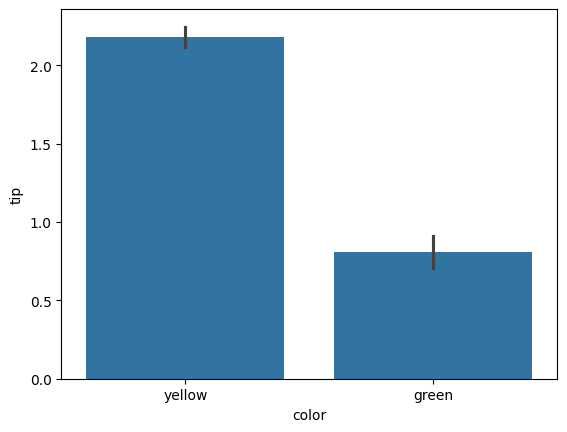

In [18]:
# Graphical Analysis of Categorical Data
sns.barplot(x = df.color, y = df.tip, estimator='mean')

<Axes: xlabel='color', ylabel='tip'>

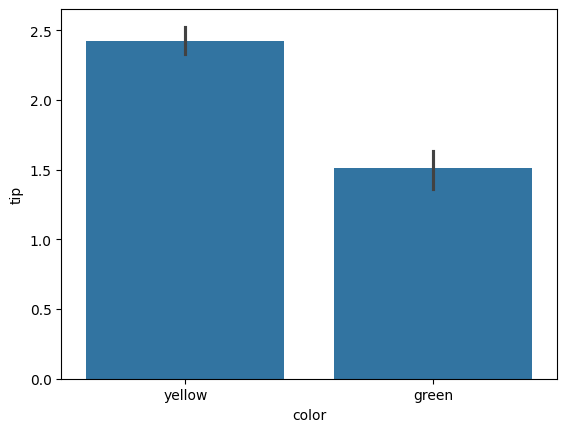

In [19]:

sns.barplot(x = df.color, y = df.tip, estimator='std')

In [20]:
df.color.value_counts()

,count
color,
yellow,5373
green,968


<Axes: ylabel='count'>

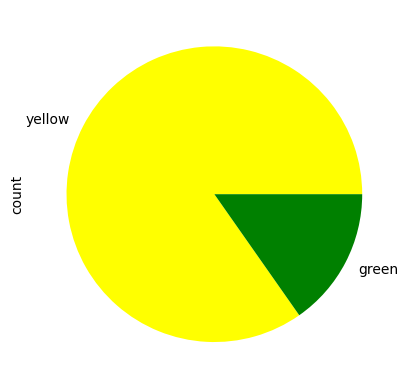

In [21]:
df.color.value_counts().plot(kind='pie', colors = ['yellow', 'green'])

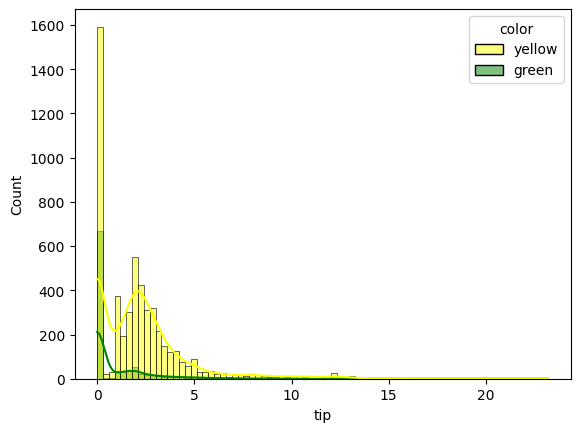

In [22]:
sns.histplot(x = df.tip, hue = df.color, kde = True, palette = ['yellow', 'green'])
plt.show()

#Hypothesis Testing

1. H0 : Distribution of tip for Yellow = distribution of tip for green
2. H1 : distribution of tip for yellow != distribution of tip for green

### Independent T-Test

In [23]:
yellow_tip = df['tip'] [df['color'] == 'yellow']
green_tip = df['tip'] [df['color'] == 'green']

In [24]:
green_tip.shape

(968,)

In [25]:
yellow_tip.shape

(5373,)

In [26]:
# Independent T-Test

from scipy import stats

t_stat, p_val = stats.ttest_ind(yellow_tip, green_tip)
print("Independent T-Test Statistics:", t_stat)
print("P-value:", p_val)


Independent T-Test Statistics: 17.05932566128597
P-value: 7.791088119489451e-64


In [27]:
alpha = 0.05
if p_val < alpha:
  print("Reject the null hypothesis : The tip for yellow category is different that of green ")
else:
  print("Fail to reject the null hypothesis: ")

Reject the null hypothesis : The tip for yellow category is different that of green 


In [28]:
# Payment is the Target column

In [29]:
# Tip is the numerical feature, analyze with payment feature with categorical

In [30]:
df.payment.value_counts()

,count
payment,
credit card,4546
cash,1795


#Graphical Analysis of Categorical Data

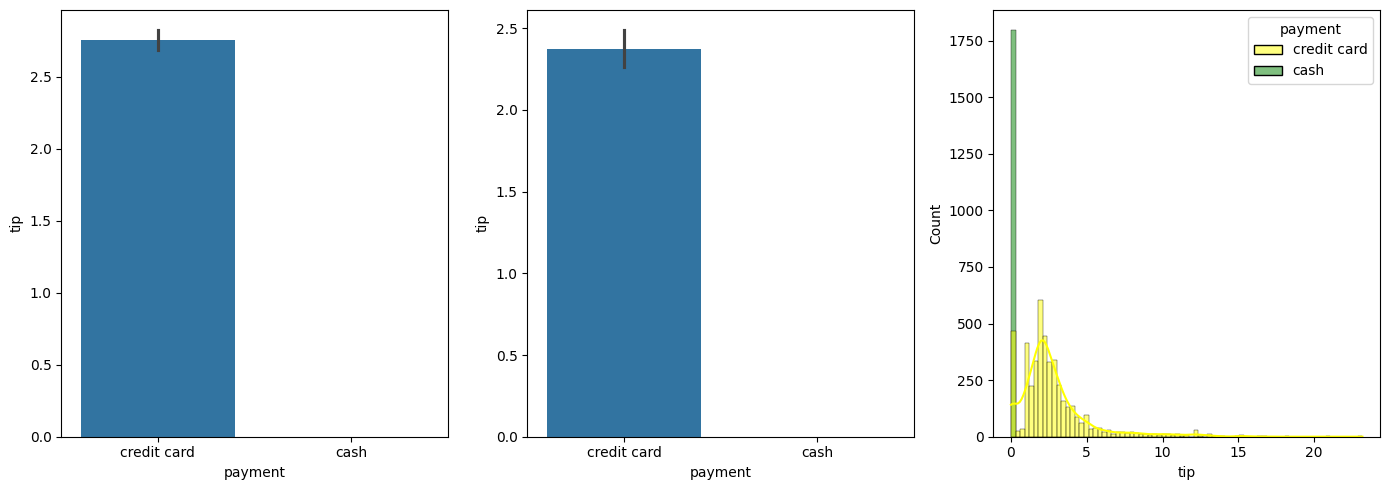

In [31]:
# Graphical Analysis of Categorical Data
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.barplot(x = df.payment, y = df.tip, estimator='mean')

plt.subplot(1,3,2)
sns.barplot(x = df.payment, y = df.tip, estimator='std')

plt.subplot(1,3,3)
sns.histplot(x = df.tip, hue = df.payment, kde = True, palette = ['yellow', 'green'])
plt.tight_layout()
plt.show()

# Graphical Analysis of Categorical Data

<Axes: xlabel='payment', ylabel='tip'>

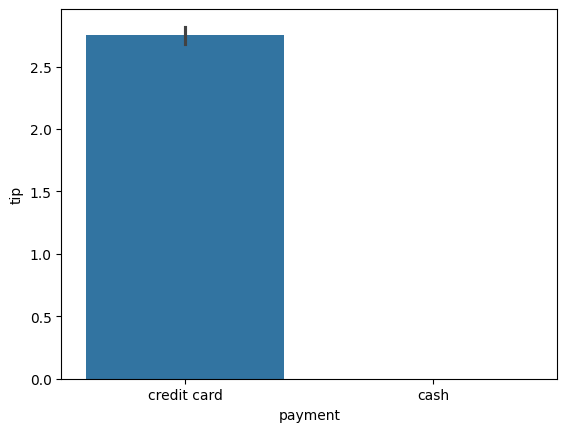

In [32]:
sns.barplot(x = df.payment, y = df.tip, estimator='mean')

<Axes: xlabel='payment', ylabel='tip'>

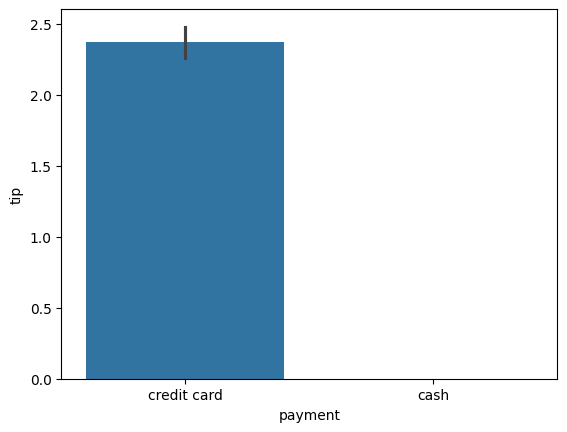

In [33]:
sns.barplot(x = df.payment, y = df.tip, estimator='std')

In [34]:
df.payment.value_counts()

,count
payment,
credit card,4546
cash,1795


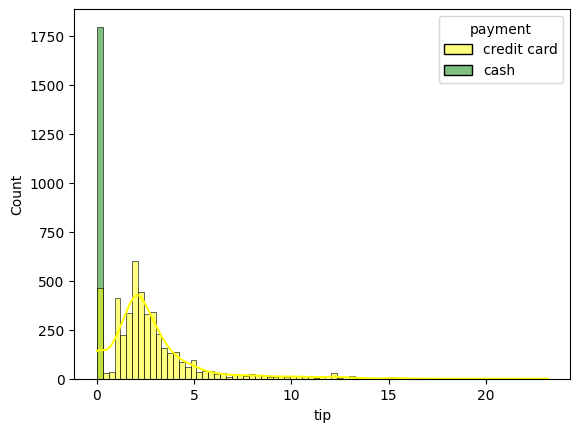

In [35]:
sns.histplot(x = df.tip, hue = df.payment, kde = True, palette = ['yellow', 'green'])
plt.show()

In [36]:
creditcard_tip = df['tip'] [df['payment'] == 'credit card']
cash_tip = df['tip'] [df['payment'] == 'cash']

In [37]:
creditcard_tip.shape

(4546,)

In [38]:
cash_tip.shape

(1795,)

In [39]:
# Independent T-Test

from scipy import stats

t_stati, p_value = stats.ttest_ind(creditcard_tip, cash_tip)
print("Independent T-Test Statistics:", t_stati)
print("P-value:", p_value)


Independent T-Test Statistics: 49.09538452722153
P-value: 0.0


In [40]:
alpha1 = 0.05
if p_value < alpha1:
  print("Reject the null hypothesis: ")
else:
  print("Fail to reject the null hypothesis: ")

Reject the null hypothesis: 


In [41]:
# # pickup_borough is the Traget Column

df['pickup_borough'].value_counts()

,count
pickup_borough,
Manhattan,5226
Queens,638
Brooklyn,378
Bronx,99


/tmp/ipython-input-1817961349.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['pickup_borough'], palette = ['red', 'blue', 'green', 'purple'])


<Axes: xlabel='pickup_borough', ylabel='count'>

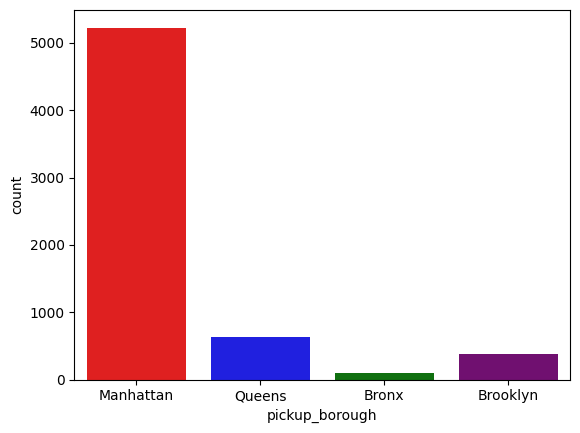

In [42]:
sns.countplot(x = df['pickup_borough'], palette = ['red', 'blue', 'green', 'purple'])

/tmp/ipython-input-46641695.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['pickup_borough'], y = df['tip'], palette = 'Set2')


<Axes: xlabel='pickup_borough', ylabel='tip'>

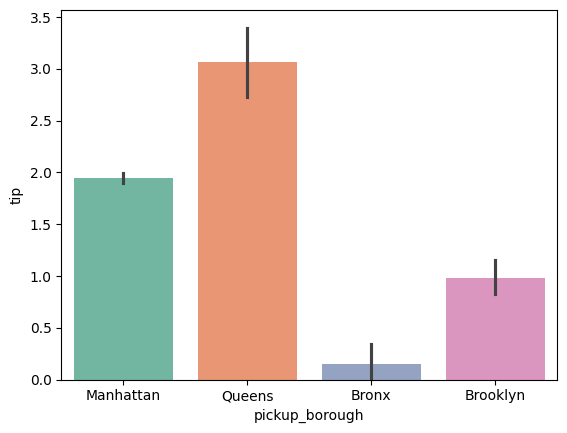

In [43]:
sns.barplot(x = df['pickup_borough'], y = df['tip'], palette = 'Set2')

In [44]:
df['tip'].groupby(df['pickup_borough']).std()

,tip
pickup_borough,
Bronx,0.897261
Brooklyn,1.674487
Manhattan,1.997736
Queens,4.323951


In [45]:
df['tip'].groupby(df['pickup_borough']).mean()

,tip
pickup_borough,
Bronx,0.148586
Brooklyn,0.979127
Manhattan,1.945597
Queens,3.066458


/tmp/ipython-input-2868830710.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['pickup_borough'], y = df['tip'], palette = 'Set2', estimator='std')


<Axes: xlabel='pickup_borough', ylabel='tip'>

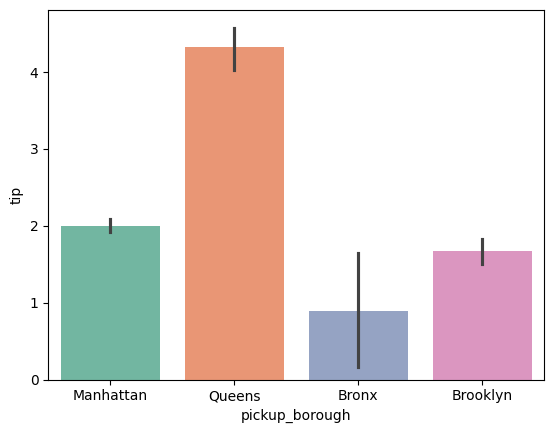

In [46]:
sns.barplot(x = df['pickup_borough'], y = df['tip'], palette = 'Set2', estimator='std')

<Axes: xlabel='tip', ylabel='Count'>

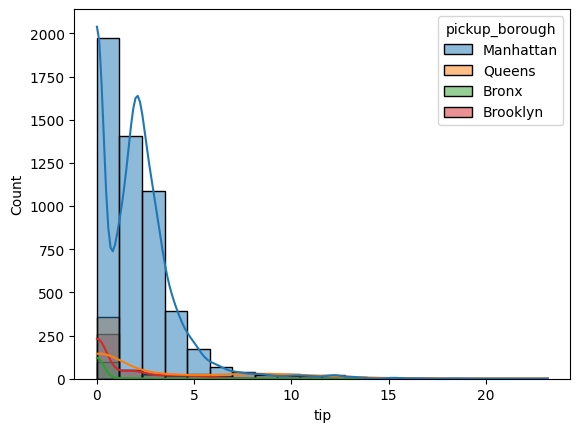

In [47]:
sns.histplot(hue = df['pickup_borough'], x = df['tip'], bins = 20, kde = True)

# Hypothesis:
1. H0 : distribution of tip is the same across aii pickup_borough categories
2. H1 : Atleast one category has a different distribution of tip.

In [48]:
manhattan_tip = df['tip'][df['pickup_borough'] == 'Manhattan']
queens_tip = df['tip'][df['pickup_borough'] == 'Queens']
brooklyn_tip = df['tip'][df['pickup_borough'] == 'Brooklyn']
bronx_tip = df['tip'][df['pickup_borough'] == 'Bronx']

In [49]:
# ANOVA Test

regions = [group['tip'] for name, group in df.groupby('pickup_borough')]

f_stat, p_vals = stats.f_oneway(manhattan_tip, queens_tip, brooklyn_tip, bronx_tip)
print("ANOVA Test Statistics:", f_stat)
print("P-value:", p_vals)

alpha = 0.05
if p_vals < alpha:
  print("Reject the null hypothesis: ")
else:
  print("Fail to reject the null hypothesis: ")

ANOVA Test Statistics: 91.57933831850573
P-value: 5.155109332422435e-58
Reject the null hypothesis: 


# Hypothesis for Tukey test (for each pair of groups):
1. H0 : distribution of group1 = distribution of group2
2. H1 : distribution of group1 != distribution of group2

In [50]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey HSD
tukey_result = pairwise_tukeyhsd(endog = df.tip, groups = df.pickup_borough, alpha = 0.05)
print(tukey_result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1    group2  meandiff p-adj lower  upper  reject
-------------------------------------------------------
    Bronx  Brooklyn   0.8305 0.008 0.1595 1.5015   True
    Bronx Manhattan    1.797   0.0  1.194    2.4   True
    Bronx    Queens   2.9179   0.0 2.2759 3.5599   True
 Brooklyn Manhattan   0.9665   0.0 0.6499  1.283   True
 Brooklyn    Queens   2.0873   0.0 1.7016 2.4731   True
Manhattan    Queens   1.1209   0.0 0.8716 1.3701   True
-------------------------------------------------------


In [51]:
# dropoff_borough is the Traget Column
df['dropoff_borough'].value_counts()

,count
dropoff_borough,
Manhattan,5172
Queens,534
Brooklyn,497
Bronx,136
Staten Island,2


/tmp/ipython-input-3836528350.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['dropoff_borough'], palette = 'Set2')


<Axes: xlabel='dropoff_borough', ylabel='count'>

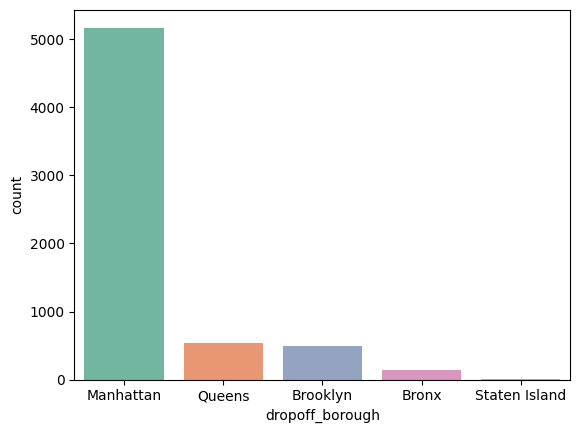

In [52]:
sns.countplot(x = df['dropoff_borough'], palette = 'Set2')

/tmp/ipython-input-3281878115.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['dropoff_borough'], y = df['tip'], palette = 'Set2')


<Axes: xlabel='dropoff_borough', ylabel='tip'>

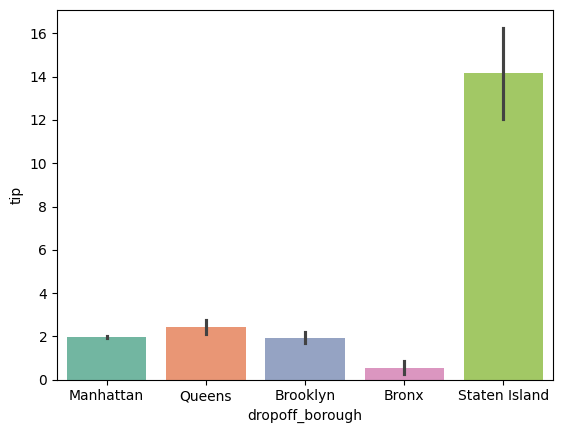

In [53]:
sns.barplot(x = df['dropoff_borough'], y = df['tip'], palette = 'Set2')

In [54]:
df['tip'].groupby(df['dropoff_borough']).std()

,tip
dropoff_borough,
Bronx,1.788795
Brooklyn,2.896229
Manhattan,2.052074
Queens,3.947016
Staten Island,2.976920


In [55]:
df['tip'].groupby(df['dropoff_borough']).std()

,tip
dropoff_borough,
Bronx,1.788795
Brooklyn,2.896229
Manhattan,2.052074
Queens,3.947016
Staten Island,2.976920


/tmp/ipython-input-4128063048.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['dropoff_borough'], y = df['tip'], palette = 'Set2', estimator='std')


<Axes: xlabel='dropoff_borough', ylabel='tip'>

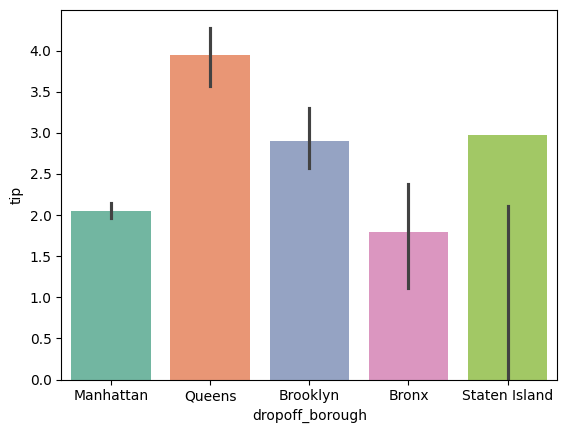

In [56]:
sns.barplot(x = df['dropoff_borough'], y = df['tip'], palette = 'Set2', estimator='std')

<Axes: xlabel='tip', ylabel='Count'>

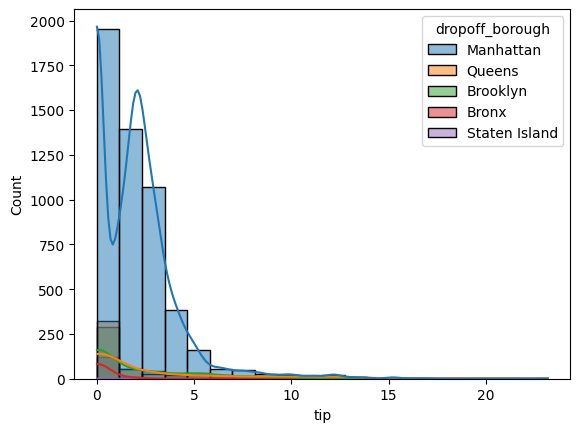

In [57]:
sns.histplot(hue = df['dropoff_borough'], x = df['tip'], bins = 20, kde = True)

# Hypothesis:
1. H0 : distribution of tip is the same across aii pickup_borough categories
2. H1 : Atleast one category has a different distribution of tip.

In [58]:
manhattan_tip = df['tip'][df['pickup_borough'] == 'Manhattan']
queens_tip = df['tip'][df['pickup_borough'] == 'Queens']
brooklyn_tip = df['tip'][df['pickup_borough'] == 'Brooklyn']
bronx_tip = df['tip'][df['pickup_borough'] == 'Bronx']
staten_tip = df['tip'][df['pickup_borough'] == 'Staten Island']

In [59]:
# ANOVA Test

regions2 = [group['tip'] for name, group in df.groupby('dropoff_borough')]

f_stat, p_vals = stats.f_oneway(manhattan_tip, queens_tip, brooklyn_tip, bronx_tip, staten_tip)
print("ANOVA Test Statistics:", f_stat)
print("P-value:", p_vals)

alpha = 0.05
if p_vals < alpha:
  print("Reject the null hypothesis: ")
else:
  print("Fail to reject the null hypothesis: ")

ANOVA Test Statistics: nan
P-value: nan
Fail to reject the null hypothesis: 


/tmp/ipython-input-2084116809.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_vals = stats.f_oneway(manhattan_tip, queens_tip, brooklyn_tip, bronx_tip, staten_tip)


# Hypothesis for Tukey test (for each pair of groups):
1. H0 : distribution of group1 = distribution of group2
2. H1 : distribution of group1 != distribution of group2

In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey HSD
tukey_result2 = pairwise_tukeyhsd(endog = df.tip, groups = df.dropoff_borough, alpha = 0.05)
print(tukey_result2)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    Bronx      Brooklyn   1.3869    0.0  0.7691  2.0046   True
    Bronx     Manhattan   1.4296    0.0  0.8751  1.9842   True
    Bronx        Queens   1.8873    0.0  1.2742  2.5005   True
    Bronx Staten Island  13.6303    0.0  9.0833 18.1773   True
 Brooklyn     Manhattan   0.0427 0.9952 -0.2571  0.3425  False
 Brooklyn        Queens   0.5004 0.0055  0.1026  0.8983   True
 Brooklyn Staten Island  12.2434    0.0  7.7204 16.7664   True
Manhattan        Queens   0.4577 0.0002  0.1675  0.7479   True
Manhattan Staten Island  12.2007    0.0  7.6859 16.7154   True
   Queens Staten Island   11.743    0.0  7.2206 16.2653   True
--------------------------------------------------------------


In [61]:
df['pickup_borough'].value_counts()

,count
pickup_borough,
Manhattan,5226
Queens,638
Brooklyn,378
Bronx,99


In [62]:
df['dropoff_borough'].value_counts()

,count
dropoff_borough,
Manhattan,5172
Queens,534
Brooklyn,497
Bronx,136
Staten Island,2


<Axes: xlabel='dropoff_zone', ylabel='count'>

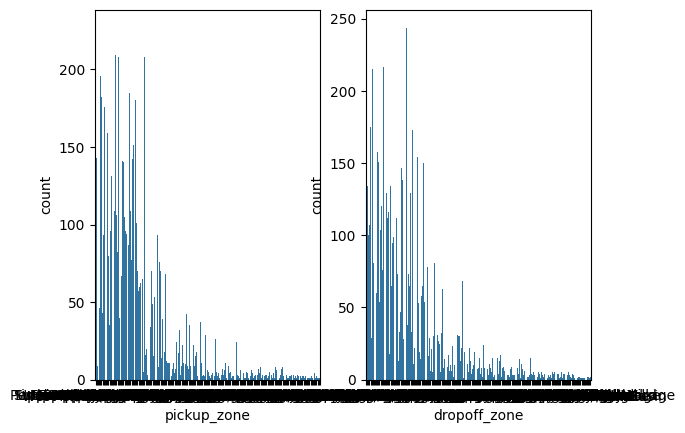

In [63]:
plt.subplot(1,2,1)
sns.countplot(x = df['pickup_zone'])
plt.subplot(1,2,2)
sns.countplot(x = df['dropoff_zone'])

<Axes: xlabel='pickup_zone', ylabel='count'>

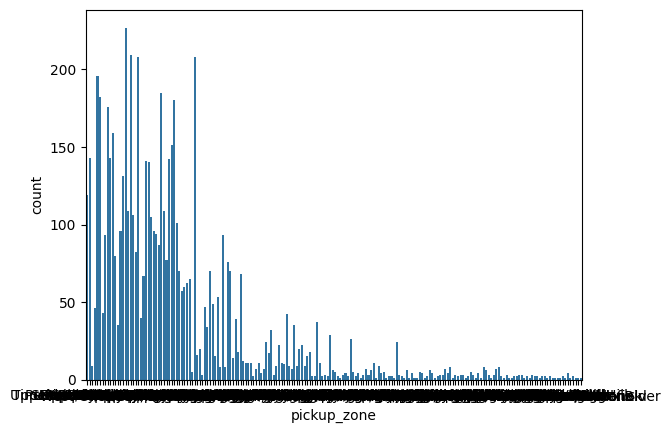

In [64]:
sns.countplot(x = df['pickup_zone'])

# Anova Test 3

In [65]:
categories = [group['tip'].values for name, group in df.groupby('pickup_zone')]

f_stat, p_val = stats.f_oneway(*categories)
print("p-value:", p_val)
alpha = 0.05

if p_val < alpha:
  print("Reject the null hypothesis: ")
else:
  print("Fail to reject the null hypothesis:")


p-value: 7.892434822136223e-169
Reject the null hypothesis: 


In [66]:
categories = [group['tip'].values for name, group in df.groupby('dropoff_zone')]

f_stat, p_val = stats.f_oneway(*categories)
print("p-value:", p_val)
alpha = 0.05

if p_val < alpha:
  print("Reject the null hypothesis: ")
else:
  print("Fail to reject the null hypothesis:")


p-value: 1.3107168403745948e-120
Reject the null hypothesis: 


<Axes: xlabel='tip', ylabel='Count'>

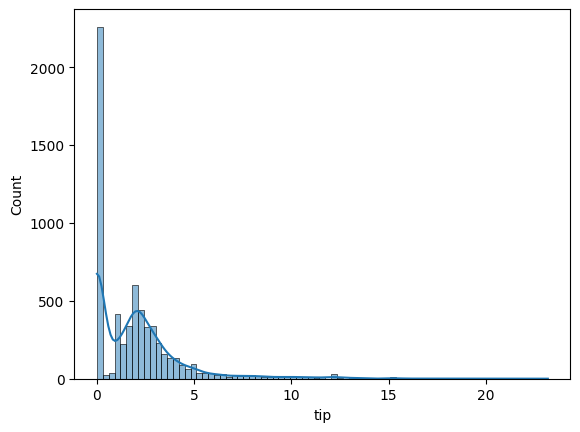

In [67]:
sns.histplot(df['tip'],kde=True)

<Axes: xlabel='passengers', ylabel='Count'>

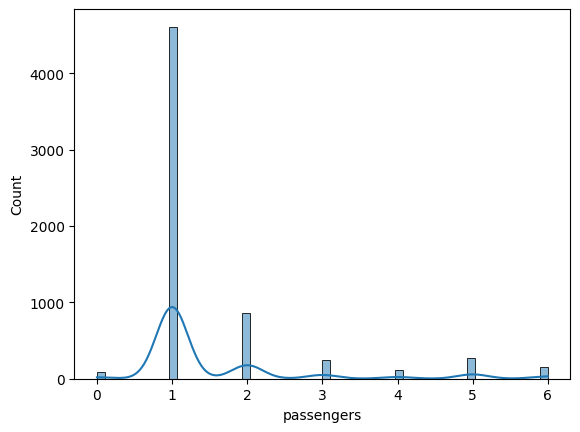

In [68]:
sns.histplot(df['passengers'], kde = True)

<Axes: xlabel='distance', ylabel='Count'>

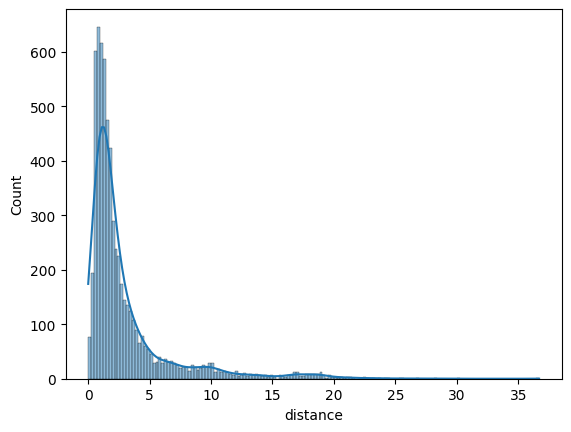

In [69]:
sns.histplot(df['distance'],kde=True)

<Axes: xlabel='tip', ylabel='passengers'>

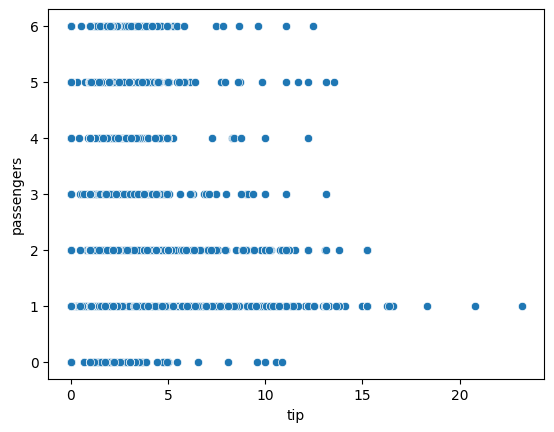

In [70]:
sns.scatterplot(x = df.tip, y = df.passengers)

#Hypothesis for Correlation for numeric variables:
1. H0 : correlation is zero
2. H1 : there is significant correlation(not zero)

In [71]:
from scipy.stats import pearsonr, spearmanr

In [72]:
r, p_val = stats.spearmanr(df['tip'], df['passengers'])
print('Correlation:', r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
  print("Reject the null hypothesis: There is no Relationship")
else:
  print("Fail to reject the null hypothesis: There is significant Relationship")

Correlation: 0.027509812818779178
P-value: 0.028480753176042872
Reject the null hypothesis: There is no Relationship


<Axes: xlabel='fare', ylabel='Count'>

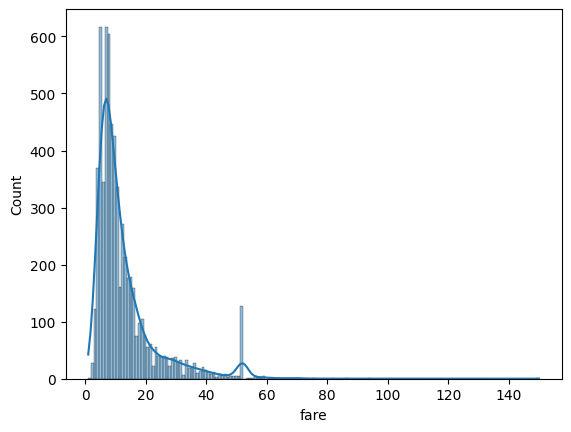

In [73]:
sns.histplot(df['fare'],kde=True)

<Axes: xlabel='tip', ylabel='fare'>

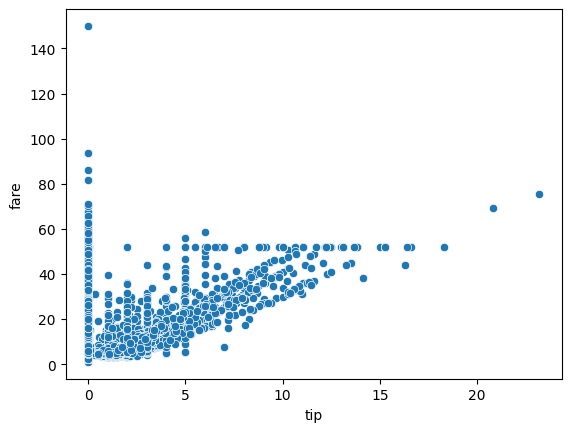

In [74]:
sns.scatterplot(x = df.tip, y = df.fare)

In [75]:
# Hypothesis test

r, p_val = stats.spearmanr(df['tip'], df['fare'])
print('Correlation:', r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
  print("Reject the null hypothesis: There is no Relationship")
else:
  print("Fail to reject the null hypothesis: There is significant Relationship")

Correlation: 0.310254279563729
P-value: 1.5556730728881364e-141
Reject the null hypothesis: There is no Relationship


### Distance Column

<Axes: xlabel='distance', ylabel='Count'>

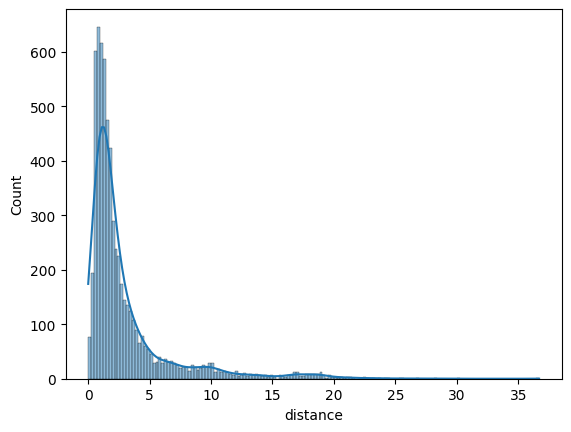

In [76]:
sns.histplot(df['distance'],kde=True)

<Axes: xlabel='tip', ylabel='distance'>

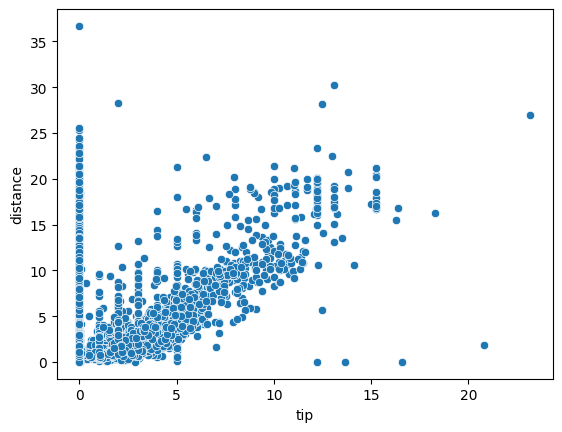

In [77]:
sns.scatterplot(x = df.tip, y = df.distance)

In [78]:
# Hypothesis test

r, p_val = stats.spearmanr(df['tip'], df['distance'])
print('Correlation:', r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
  print("Reject the null hypothesis: There is no Relationship")
else:
  print("Fail to reject the null hypothesis: There is significant Relationship")

Correlation: 0.29265085410043695
P-value: 1.9411181331374707e-125
Reject the null hypothesis: There is no Relationship


### Total column

<Axes: xlabel='total', ylabel='Count'>

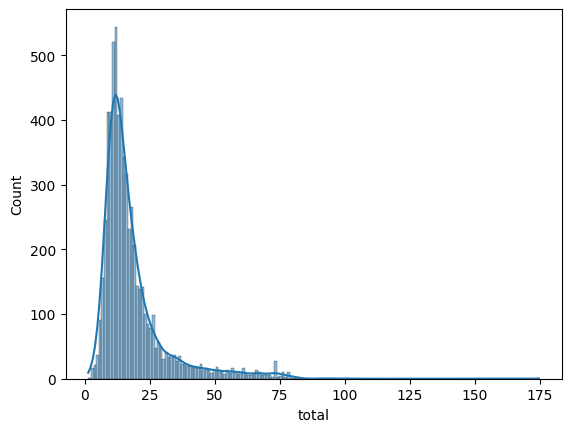

In [79]:
sns.histplot(df['total'],kde=True)

<Axes: xlabel='tip', ylabel='total'>

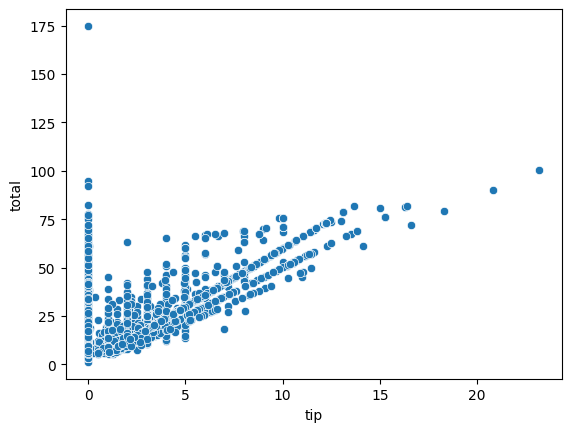

In [80]:
sns.scatterplot(x = df.tip, y = df.total)

In [81]:
# Hypothesis test

r, p_val = stats.spearmanr(df['tip'], df['total'])
print('Correlation:', r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
  print("Reject the null hypothesis: There is no Relationship")
else:
  print("Fail to reject the null hypothesis: There is significant Relationship")

Correlation: 0.5028299699182296
P-value: 0.0
Reject the null hypothesis: There is no Relationship


### Tolls column

<Axes: xlabel='tolls', ylabel='Count'>

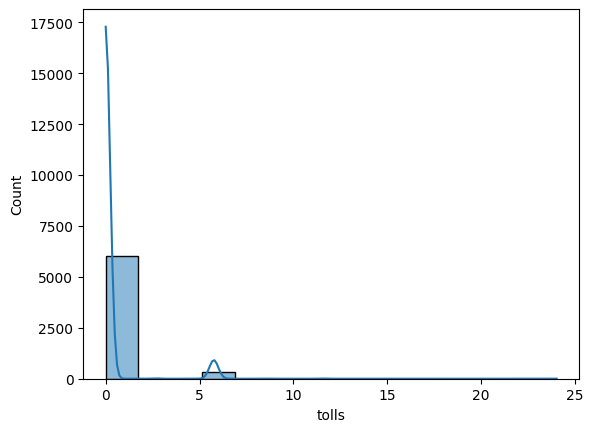

In [82]:
sns.histplot(df['tolls'],kde=True)

<Axes: xlabel='tip', ylabel='tolls'>

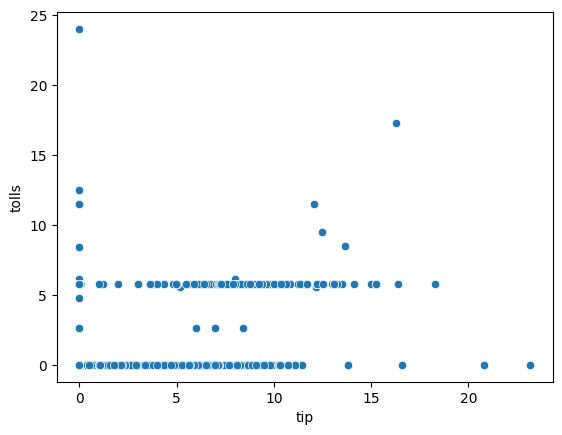

In [83]:
sns.scatterplot(x = df.tip, y = df.tolls)

In [84]:
# Hypothesis test

r, p_val = stats.spearmanr(df['tip'], df['tolls'])
print('Correlation:', r)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
  print("Reject the null hypothesis: There is no Relationship")
else:
  print("Fail to reject the null hypothesis: There is significant Relationship")

Correlation: 0.175380002891528
P-value: 5.643276180955435e-45
Reject the null hypothesis: There is no Relationship


### HeatMap

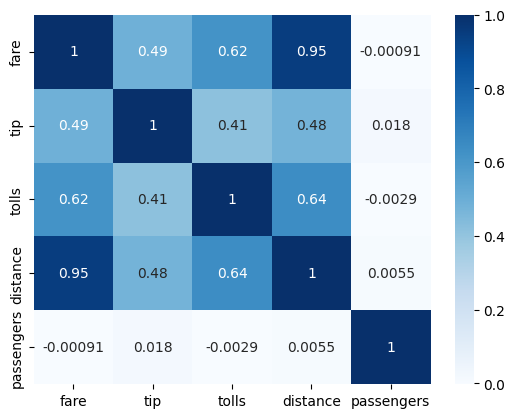

In [85]:
nm = df[['fare', 'tip', 'tolls', 'distance', 'passengers']]
sns.heatmap(nm.corr(), annot = True, cmap = 'Blues')
plt.show()